In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('Data/sp500data.csv')

In [64]:
df['Open Log return'] = np.log(df['Open']/df['Open'].shift(1))
df['High Log return'] = np.log(df['High']/df['High'].shift(1))
df['Low Log return'] = np.log(df['Low']/df['Low'].shift(1))
df['Close Log return'] = np.log(df['Close']/df['Close'].shift(1))

In [28]:
df.set_index('Date').loc['2011-11-07']

,Time,Open,High,Low,Close,Open Log return,High Log return,Low Log return,Close Log return
Date,,,,,,,,,
2011-11-07,08:31:00,1253.21,1253.21,1251.93,1251.93,-0.000016,-0.000016,-0.001038,-0.001038
2011-11-07,08:32:00,1251.56,1252.49,1251.56,1252.49,-0.001317,-0.000575,-0.000296,0.000447
2011-11-07,08:33:00,1252.63,1253.93,1252.63,1253.93,0.000855,0.001149,0.000855,0.001149
2011-11-07,08:34:00,1254.17,1254.17,1252.85,1252.85,0.001229,0.000191,0.000176,-0.000862
2011-11-07,08:35:00,1252.99,1254.22,1252.99,1254.22,-0.000941,0.000040,0.000112,0.001093
...,...,...,...,...,...,...,...,...,...
2011-11-07,15:17:00,1261.12,1261.12,1261.12,1261.12,0.000000,0.000000,0.000000,0.000000
2011-11-07,15:18:00,1261.12,1261.12,1261.12,1261.12,0.000000,0.000000,0.000000,0.000000
2011-11-07,15:19:00,1261.12,1261.12,1261.12,1261.12,0.000000,0.000000,0.000000,0.000000


In [65]:
o = df.pivot_table(values='Open', index='Date', columns='Time')
h = df.pivot_table(values='High', index='Date', columns='Time')
l = df.pivot_table(values='Low', index='Date', columns='Time')
cl = df.pivot_table(values='Close', index='Date', columns='Time')
ro = df.pivot_table(values='Open Log return', index='Date', columns='Time')
rh=df.pivot_table(values='High Log return', index='Date', columns='Time')
rl=df.pivot_table(values='Low Log return', index='Date', columns='Time')
rcl=df.pivot_table(values='Close Log return', index='Date', columns='Time')

In [66]:
o = o.loc['2010-01-01':'2020-12-31',:]
h = h.loc['2010-01-01':'2020-12-31',:]
l = l.loc['2010-01-01':'2020-12-31',:]
cl = cl.loc['2010-01-01':'2020-12-31',:]
ro = ro.loc['2010-01-01':'2020-12-31',:]
rh = rh.loc['2010-01-01':'2020-12-31',:]
rl = rl.loc['2010-01-01':'2020-12-31',:]
rcl = rcl.loc['2010-01-01':'2020-12-31',:]
o = o.dropna()
h = h.dropna()
l = l.dropna()
cl = cl.dropna()
ro = ro.dropna()
rh = rh.dropna()
rl = rl.dropna()
rcl = rcl.dropna()

In [78]:
np.savetxt('sp500 open time series.txt', o.values, fmt='%1.4f')
np.savetxt('sp500 high time series.txt', h.values, fmt='%1.4f')
np.savetxt('sp500 low time series.txt', l.values, fmt='%1.4f')
np.savetxt('sp500 close time series.txt', cl.values, fmt='%1.4f')
np.savetxt('sp500 ropen time series.txt', ro.values, fmt='%1.4f')
np.savetxt('sp500 rhigh time series.txt', rh.values, fmt='%1.4f')
np.savetxt('sp500 rlow time series.txt', rl.values, fmt='%1.4f')
np.savetxt('sp500 rclose time series.txt', rcl.values, fmt='%1.4f')

In [73]:
def GeneratePrice2(op, high, low, close, rop, rhigh, rlow, rclose):
    o1 = np.zeros([op.shape[0], op.shape[1]])
    h1 = np.zeros([high.shape[0], high.shape[1]])
    l1 = np.zeros([low.shape[0], low.shape[1]])
    cl1 = np.zeros([close.shape[0], close.shape[1]])
    o1[:, 0] = 1
    h1[:, 0] = o1[:, 0] + (high[:, 0]-op[:, 0])/op[:,0]
    l1[:, 0] = o1[:, 0] + (low[:, 0]-op[:, 0])/op[:,0]
    cl1[:, 0] = o1[:, 0] + (close[:, 0]-op[:, 0])/op[:,0]
    for i in range(1, op.shape[1]):
        o1[:, i] = o1[:, i-1] + rop[:, i]
        h1[:, i] = h1[:, i-1] + rhigh[:, i]
        l1[:, i] = l1[:, i-1] + rlow[:, i]
        cl1[:, i] = cl1[:, i-1] + rclose[:, i]
    return o1, h1, l1, cl1

In [74]:
p = GeneratePrice2(o.values, h.values, l.values, cl.values, ro.values, rh.values, rl.values, rcl.values)

In [51]:
p[1]

array([[0.99998404, 0.99940935, 1.0005584 , ..., 1.006276  , 1.006276  ,
        1.006276  ],
       [1.00407536, 1.0039253 , 1.00409115, ..., 1.01166727, 1.01166727,
        1.01166727],
       [0.99941986, 0.98545018, 0.98146608, ..., 0.96261471, 0.96261471,
        0.96261471],
       ...,
       [1.00554231, 1.00539321, 1.00518816, ..., 0.99777015, 0.99777015,
        0.99777015],
       [1.00362633, 1.00404596, 1.00431315, ..., 1.00134065, 1.00134065,
        1.00134065],
       [1.00032952, 1.00018219, 0.99991425, ..., 1.0064182 , 1.0064182 ,
        1.0064182 ]])

In [71]:
h

Time,08:31:00,08:32:00,08:33:00,08:34:00,08:35:00,08:36:00,08:37:00,08:38:00,08:39:00,08:40:00,...,15:12:00,15:13:00,15:14:00,15:15:00,15:16:00,15:17:00,15:18:00,15:19:00,15:20:00,15:21:00
Date,,,,,,,,,,,,,,,,,,,,,
2011-11-07,1253.21,1252.49,1253.93,1254.17,1254.22,1254.93,1256.06,1256.10,1256.36,1256.57,...,1261.12,1261.12,1261.12,1261.12,1261.12,1261.12,1261.12,1261.12,1261.12,1261.12
2011-11-08,1266.27,1266.08,1266.29,1266.88,1266.97,1266.69,1265.75,1265.91,1265.13,1264.96,...,1275.92,1275.92,1275.92,1275.92,1275.92,1275.92,1275.92,1275.92,1275.92,1275.92
2011-11-09,1275.18,1257.49,1252.49,1249.51,1248.29,1248.76,1248.71,1248.50,1248.53,1248.20,...,1229.10,1229.10,1229.10,1229.10,1229.10,1229.10,1229.10,1229.10,1229.10,1229.10
2011-11-10,1238.95,1241.95,1244.83,1245.10,1244.77,1243.30,1242.50,1242.33,1241.61,1241.90,...,1239.70,1239.70,1239.70,1239.70,1239.70,1239.70,1239.70,1239.70,1239.70,1239.70
2011-11-11,1250.69,1254.77,1256.84,1257.31,1256.56,1255.97,1256.25,1255.87,1256.34,1256.74,...,1263.85,1263.85,1263.85,1263.85,1263.85,1263.85,1263.85,1263.85,1263.85,1263.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,3701.51,3701.67,3702.81,3702.53,3701.38,3702.96,3706.01,3705.25,3704.84,3703.94,...,3690.01,3690.01,3690.01,3690.01,3690.01,3690.01,3690.01,3690.01,3690.01,3690.01
2020-12-28,3730.81,3731.38,3729.27,3727.95,3728.23,3729.78,3729.24,3728.60,3727.24,3727.17,...,3735.36,3735.36,3735.36,3735.36,3735.36,3735.36,3735.36,3735.36,3735.36,3735.36
2020-12-29,3756.12,3755.56,3754.79,3756.08,3756.09,3755.55,3754.10,3752.76,3751.30,3752.49,...,3727.04,3727.04,3727.04,3727.04,3727.04,3727.04,3727.04,3727.04,3727.04,3727.04


In [35]:
t = np.linspace(0, 1, 411)

In [57]:
def TimeSeriesPlot2(x, y1, y2, y3, y4, pathNum, stop, label1=None, label2=None, label3=None, label4=None, legend=True, ylabel=None):
    plt.figure(figsize=(8, 5), dpi=500)
    plt.plot(x[x <= stop], y1[pathNum, x <= stop], label=label1)
    plt.plot(x[x <= stop], y2[pathNum, x <= stop], label=label2)
    plt.plot(x[x <= stop], y3[pathNum, x <= stop], label=label3)
    plt.plot(x[x <= stop], y4[pathNum, x <= stop], label=label4)
    plt.xlim([0, stop])
    # plt.ylim([1.06, 1.11])
    plt.ylabel(ylabel)
    plt.xlabel('Time')
    if legend:
        plt.legend()
    plt.show()

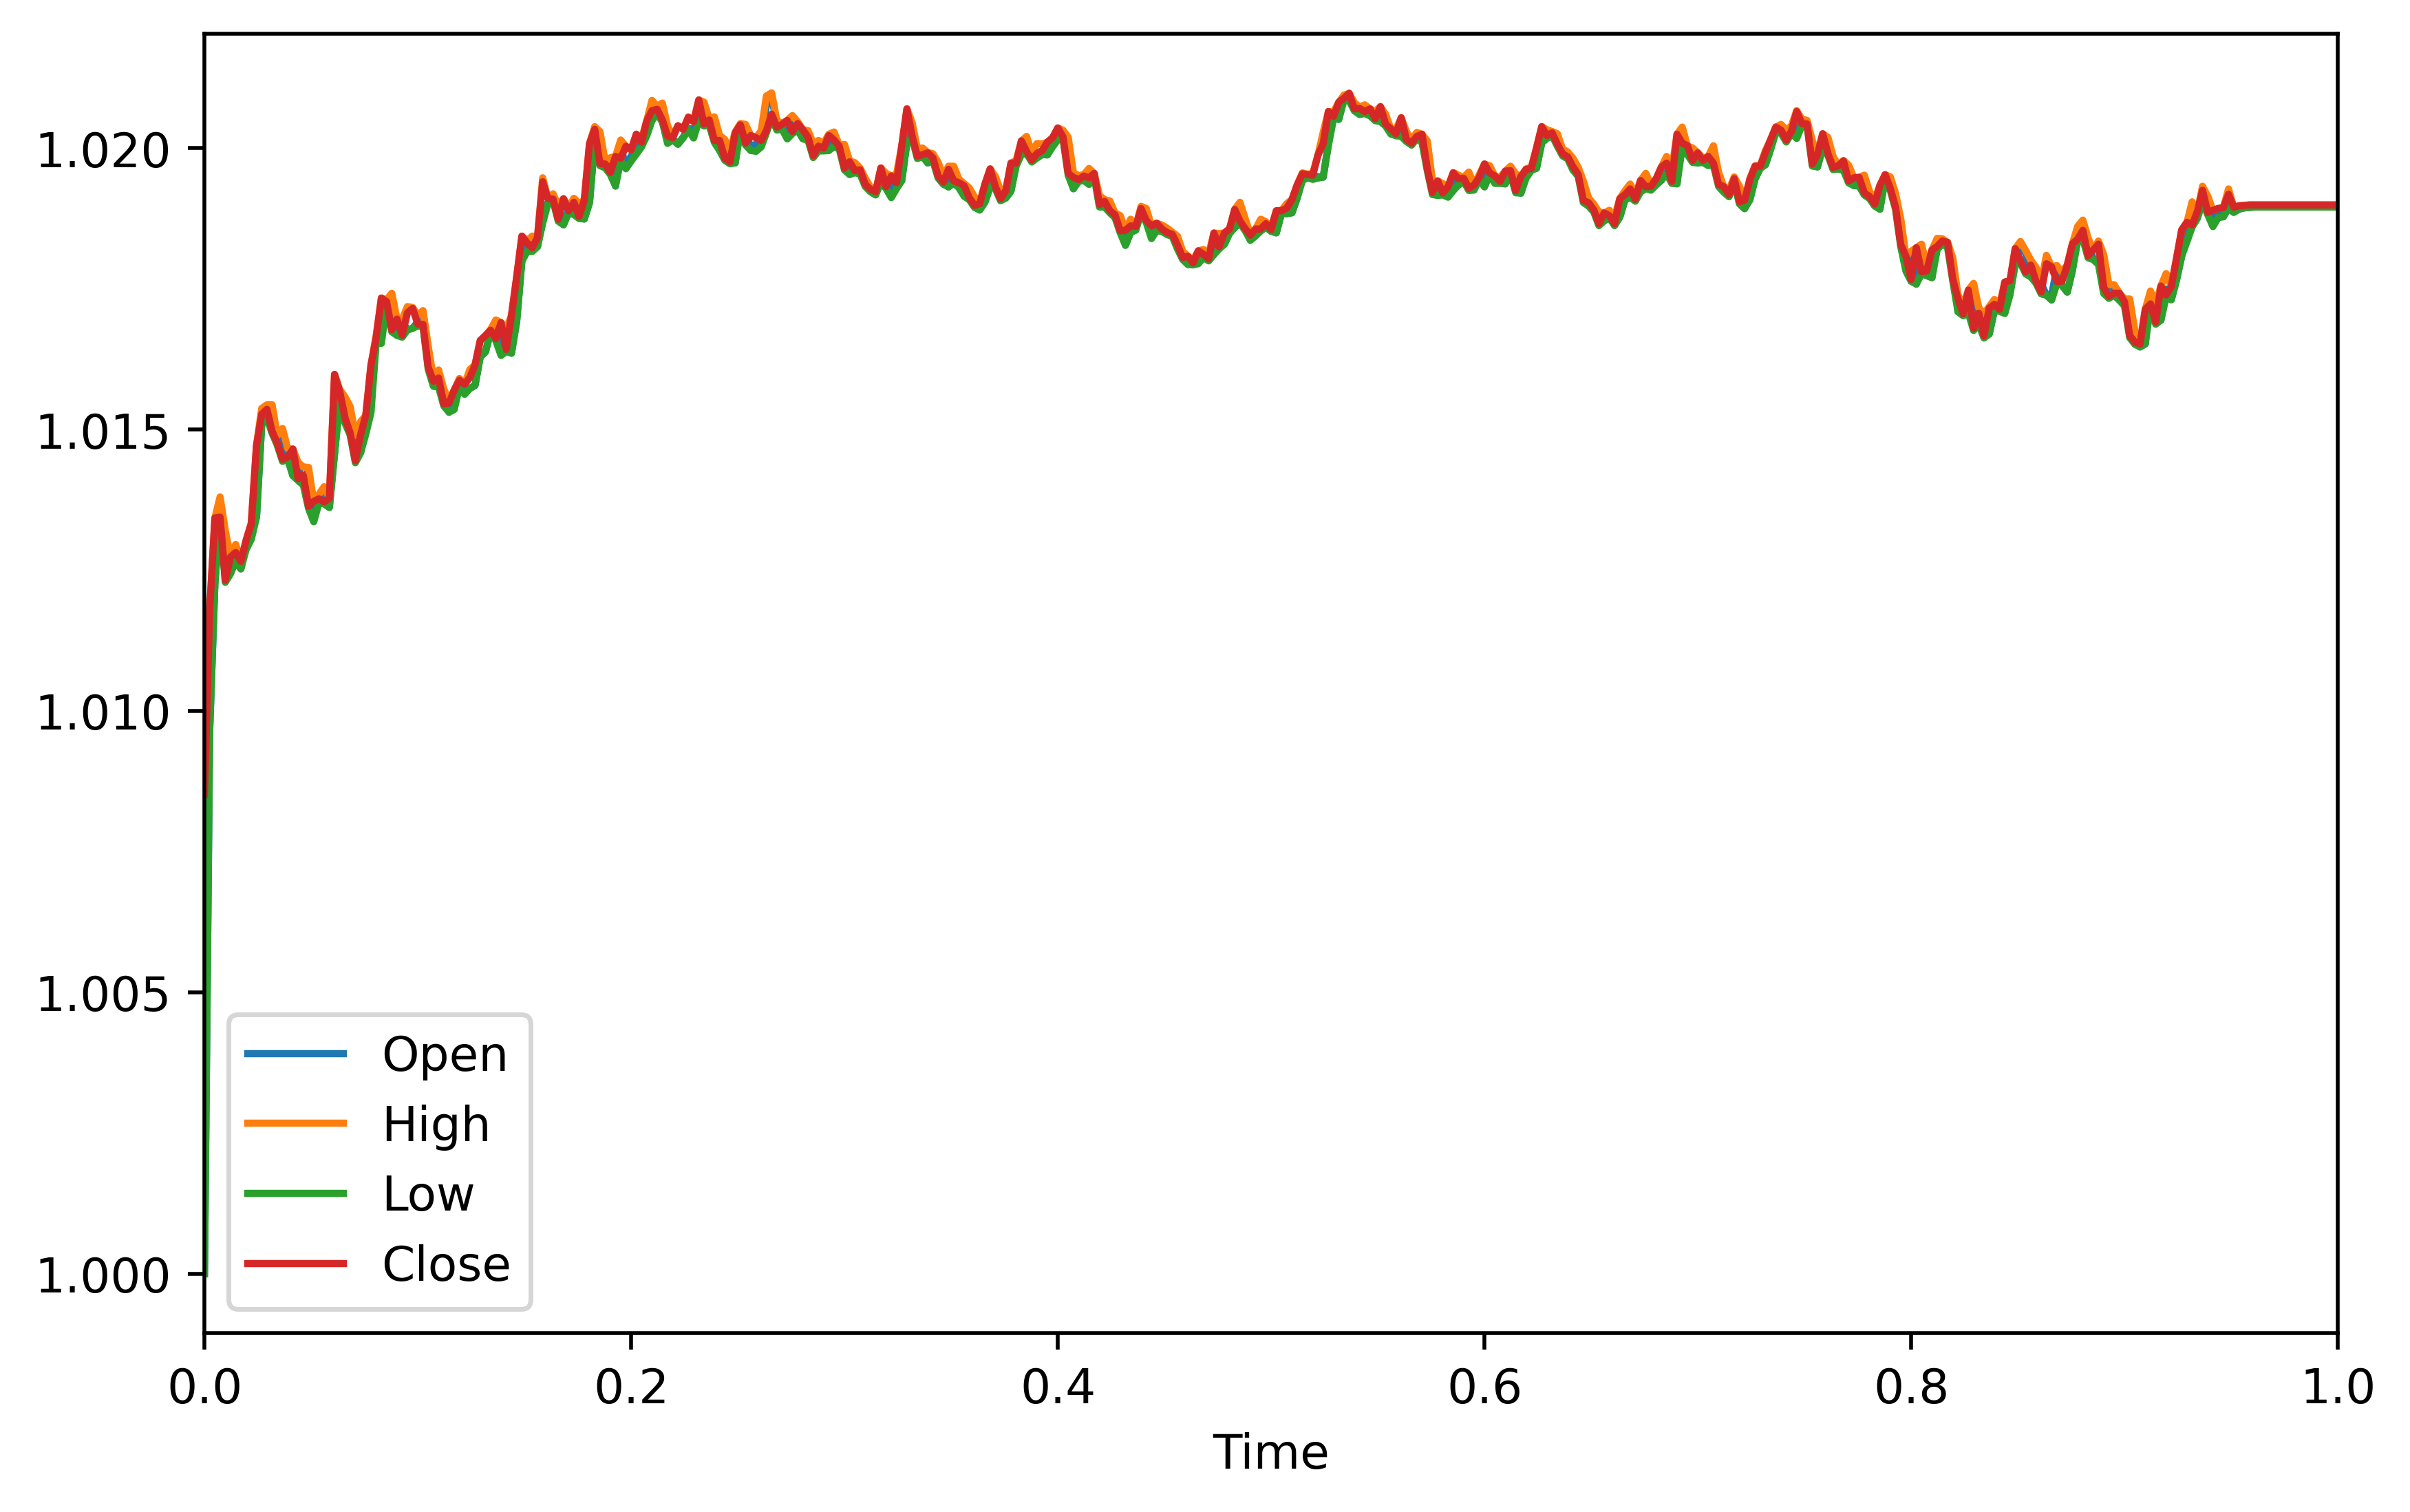

In [77]:
TimeSeriesPlot2(t, p[0], p[1], p[2], p[3], 4, 1, 'Open', 'High', 'Low', 'Close')

In [72]:
p

(array([[1.        , 0.99868251, 0.99953708, ..., 1.00629196, 1.00629196,
         1.00629196],
        [1.        , 1.0039253 , 1.00409115, ..., 1.01166727, 1.01166727,
         1.01166727],
        [1.        , 0.98603033, 0.98204622, ..., 0.96319485, 0.96319485,
         0.96319485],
        ...,
        [1.        , 1.00146026, 1.00101815, ..., 0.99385585, 0.99385585,
         0.99385585],
        [1.        , 1.00098715, 1.00158859, ..., 0.99888863, 0.99888863,
         0.99888863],
        [1.        , 0.99973478, 0.99958473, ..., 1.00608867, 1.00608867,
         1.00608867]]),
 array([[ 0.00000000e+00, -5.74689723e-04,  5.74359645e-04, ...,
          6.29195539e-03,  6.29195539e-03,  6.29195539e-03],
        [ 0.00000000e+00, -1.50058247e-04,  1.57942951e-05, ...,
          7.59191591e-03,  7.59191591e-03,  7.59191591e-03],
        [ 0.00000000e+00, -1.39696744e-02, -1.79537752e-02, ...,
         -3.68051509e-02, -3.68051509e-02, -3.68051509e-02],
        ...,
        [ 0.000000

In [62]:
h

Time,08:31:00,08:32:00,08:33:00,08:34:00,08:35:00,08:36:00,08:37:00,08:38:00,08:39:00,08:40:00,...,15:12:00,15:13:00,15:14:00,15:15:00,15:16:00,15:17:00,15:18:00,15:19:00,15:20:00,15:21:00
Date,,,,,,,,,,,,,,,,,,,,,
2011-11-07,0.999984,1252.49,1253.93,1254.17,1254.22,1254.93,1256.06,1256.10,1256.36,1256.57,...,1261.12,1261.12,1261.12,1261.12,1261.12,1261.12,1261.12,1261.12,1261.12,1261.12
2011-11-08,1.004075,1266.08,1266.29,1266.88,1266.97,1266.69,1265.75,1265.91,1265.13,1264.96,...,1275.92,1275.92,1275.92,1275.92,1275.92,1275.92,1275.92,1275.92,1275.92,1275.92
2011-11-09,0.999420,1257.49,1252.49,1249.51,1248.29,1248.76,1248.71,1248.50,1248.53,1248.20,...,1229.10,1229.10,1229.10,1229.10,1229.10,1229.10,1229.10,1229.10,1229.10,1229.10
2011-11-10,1.007982,1241.95,1244.83,1245.10,1244.77,1243.30,1242.50,1242.33,1241.61,1241.90,...,1239.70,1239.70,1239.70,1239.70,1239.70,1239.70,1239.70,1239.70,1239.70,1239.70
2011-11-11,1.008826,1254.77,1256.84,1257.31,1256.56,1255.97,1256.25,1255.87,1256.34,1256.74,...,1263.85,1263.85,1263.85,1263.85,1263.85,1263.85,1263.85,1263.85,1263.85,1263.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,1.003857,3701.67,3702.81,3702.53,3701.38,3702.96,3706.01,3705.25,3704.84,3703.94,...,3690.01,3690.01,3690.01,3690.01,3690.01,3690.01,3690.01,3690.01,3690.01,3690.01
2020-12-28,1.007261,3731.38,3729.27,3727.95,3728.23,3729.78,3729.24,3728.60,3727.24,3727.17,...,3735.36,3735.36,3735.36,3735.36,3735.36,3735.36,3735.36,3735.36,3735.36,3735.36
2020-12-29,1.005542,3755.56,3754.79,3756.08,3756.09,3755.55,3754.10,3752.76,3751.30,3752.49,...,3727.04,3727.04,3727.04,3727.04,3727.04,3727.04,3727.04,3727.04,3727.04,3727.04
